# Import data

In [51]:
import pandas as pd
import geopandas as gpd
import arrow


# Source = https://data.ca.gov/dataset/water-quality-data/resource/82916200-3700-4e3d-83d5-0a3ac6dc31a8
file_name = 'field_results'
today = arrow.utcnow().format('MMDDYY')

def import_df(file_name):
	print(today)
	try:
		df = pd.read_parquet(f'{file_name}.parquet')
	except:
		print("Creating Feather file")
		# !pip install pyarrow
		df = pd.read_csv(f'{file_name}.csv')
		df.to_parquet(f'{file_name}_{today}.parquet')

	return df
full_df = import_df(file_name)

020822


In [52]:
def trim_dates(df,years):
	df_trim = df.loc[pd.to_datetime(df['SAMPLE_DATE']).dt.year.isin(years)]
	# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
	df_trim['Month'] = pd.to_datetime(df_trim['SAMPLE_DATE']).dt.strftime('%B %Y')
	return df_trim

df_trim = trim_dates(full_df,[2018,2019,2020,2021,2022])

C:\Users\dnoell\AppData\Local\Temp\ipykernel_8012\352117056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trim['Month'] = pd.to_datetime(df_trim['SAMPLE_DATE']).dt.strftime('%B %Y')


In [53]:
df = df_trim
df.head(2)

,STATION_ID,STATION_NAME,STATION_NUMBER,FULL_STATION_NAME,STATION_TYPE,LATITUDE,LONGITUDE,STATUS,COUNTY_NAME,SAMPLE_CODE,...,ANL_DATA_TYPE,PARAMETER,FDR_RESULT,FDR_TEXT_RESULT,FDR_DATE_RESULT,FDR_REPORTING_LIMIT,UNS_NAME,MTH_NAME,FDR_FOOTNOTE,Month
5848,12,H.O. Banks Headworks,KA000331,Delta P.P. Headworks at H.O. Banks PP,Surface Water,37.8019,-121.62,Review Status Unknown,Alameda,D0118B0001,...,None,SpecificConductance,550.0,None,None,1.0,uS/cm@25 °C,EPA 120.1 (Field),None,January 2018
5849,12,H.O. Banks Headworks,KA000331,Delta P.P. Headworks at H.O. Banks PP,Surface Water,37.8019,-121.62,Review Status Unknown,Alameda,D0118B0001,...,None,WaterTemperature,10.9,None,None,0.1,°C,EPA 170.1 (Field),None,January 2018


In [56]:
df = df_trim.loc[
	(df_trim['STATION_NAME'] == 'H.O. Banks Headworks') & 
	(df_trim['PARAMETER'] == 'DissolvedOxygen' )]
df[['PARAMETER','FDR_RESULT','UNS_NAME','SAMPLE_DATE','SAMPLE_DEPTH','SAMPLE_DEPTH_UNITS','Month']].head(5)

,PARAMETER,FDR_RESULT,UNS_NAME,SAMPLE_DATE,SAMPLE_DEPTH,SAMPLE_DEPTH_UNITS,Month
5850,DissolvedOxygen,6.8,mg/L,2018-01-17 08:55:00,1.0,Meters,January 2018
5859,DissolvedOxygen,7.1,mg/L,2018-02-21 08:25:00,1.0,Meters,February 2018
5864,DissolvedOxygen,7.8,mg/L,2018-03-21 07:10:00,1.0,Meters,March 2018
5871,DissolvedOxygen,6.3,mg/L,2018-04-17 08:10:00,1.0,Meters,April 2018
5878,DissolvedOxygen,7.5,mg/L,2018-05-15 07:30:00,1.0,Meters,May 2018


In [59]:
# !pip install altair
import altair as alt

In [61]:
!pip install vega_datasets
from vega_datasets import data


  Using cached vega_datasets-0.9.0-py3-none-any.whl (210 kB)


Error processing line 1 of C:\Users\dnoell\Anaconda3\envs\gis\lib\site-packages\python-certifi-win32-init.pth:

  Traceback (most recent call last):
    File "C:\Users\dnoell\Anaconda3\envs\gis\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "C:\Users\dnoell\Anaconda3\envs\gis\lib\site-packages\certifi_win32\bootstrap.py", line 3, in <module>
      import wrapt
  ModuleNotFoundError: No module named 'wrapt'

Remainder of file ignored


In [ ]:

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

## Create Geodataframe from Coordinates

In [4]:

try:
	gdf = gpd.read_parquet(f'gdf_{today}.parquet')
except:
	print("Creating File from Coordinates")
	gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x = df['LONGITUDE'],y = df['LATITUDE']))
	import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
	gdf.to_parquet(f'gdf_{today}.parquet')


# Visualize

In [5]:
# gdf.set_crs('WGS 84').explore()

In [25]:
full_gdf = gdf
full_gdf.shape

(42502, 24)

In [26]:
full_gdf.head(2)

,STATION_ID,STATION_NAME,STATION_NUMBER,FULL_STATION_NAME,STATION_TYPE,LATITUDE,LONGITUDE,STATUS,COUNTY_NAME,SAMPLE_CODE,...,ANL_DATA_TYPE,PARAMETER,FDR_RESULT,FDR_TEXT_RESULT,FDR_DATE_RESULT,FDR_REPORTING_LIMIT,UNS_NAME,MTH_NAME,FDR_FOOTNOTE,geometry
5848,12,H.O. Banks Headworks,KA000331,Delta P.P. Headworks at H.O. Banks PP,Surface Water,37.8019,-121.62,Review Status Unknown,Alameda,D0118B0001,...,None,SpecificConductance,550.0,None,None,1.0,uS/cm@25 °C,EPA 120.1 (Field),None,POINT (-121.62000 37.80190)
5849,12,H.O. Banks Headworks,KA000331,Delta P.P. Headworks at H.O. Banks PP,Surface Water,37.8019,-121.62,Review Status Unknown,Alameda,D0118B0001,...,None,WaterTemperature,10.9,None,None,0.1,°C,EPA 170.1 (Field),None,POINT (-121.62000 37.80190)


In [21]:
columns = [c for c in gdf.columns]
uniques = {c:[r for r in gdf[c].unique()] for c in columns}
unique_df = pd.DataFrame.from_dict(uniques,orient='index').T

In [22]:
unique_df.head(2)

,STATION_ID,STATION_NAME,STATION_NUMBER,FULL_STATION_NAME,STATION_TYPE,LATITUDE,LONGITUDE,STATUS,COUNTY_NAME,SAMPLE_CODE,...,ANL_DATA_TYPE,PARAMETER,FDR_RESULT,FDR_TEXT_RESULT,FDR_DATE_RESULT,FDR_REPORTING_LIMIT,UNS_NAME,MTH_NAME,FDR_FOOTNOTE,geometry
0,12,H.O. Banks Headworks,KA000331,Delta P.P. Headworks at H.O. Banks PP,Surface Water,37.8019,-121.62,Review Status Unknown,Alameda,D0118B0001,...,None,SpecificConductance,550.0,None,None,1.0,uS/cm@25 °C,EPA 120.1 (Field),None,POINT (-121.62 37.8019)
1,87,Del Valle Reservoir,DV001000,Lake Del Valle at Glory Hole,Groundwater,37.6147,-121.746,None,Alpine,C0118B0046,...,Memo,WaterTemperature,10.9,,1900-01-01 00:00:00,0.1,°C,EPA 170.1 (Field),turbidity might be too high due to insrument,POINT (-121.746 37.6147)


In [34]:
unique_df.to_clipboard()

In [20]:
gdf.to_file('calwater2021.shp')

C:\Users\dnoell\Anaconda3\envs\gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\dnoell\AppData\Local\Temp\ipykernel_65968\701060304.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('calwater2021.shp')


In [53]:
sdf = gdf[gdf['COUNTY_NAME'] == 'San Joaquin']
sdf.to_file('san_joaquin_2021.shp')

C:\Users\dnoell\Anaconda3\envs\gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\dnoell\AppData\Local\Temp\ipykernel_45692\1660223451.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sdf.to_file('san_joaquin_2021.shp')


In [ ]:

# gdf[gdf['PARAMETER'] == 'pH']

sdf = gdf[gdf['STATION_NAME'] == 'OR up Mtn House Crk']
[r for r in sdf['SAMPLE_DATE'].unique()]

<AxesSubplot:>

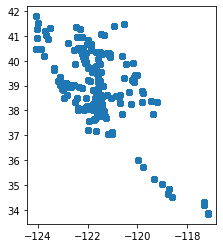

In [36]:
gdf.plot()

<AxesSubplot:>

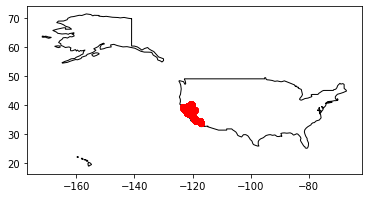

In [25]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
# ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black')
ax = world[world.name == 'United States of America'].plot(color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

# plt.show()

In [37]:
world['name'].loc[world['continent'] == 'North America'].to_list()

NameError: name 'world' is not defined

In [ ]:

gdf['SAMPLE_DATE'] = gdf['SAMPLE_DATE'].to_string()
gdf_2006.to_file('cal_water_2006.shp')

# Plot

<AxesSubplot:>

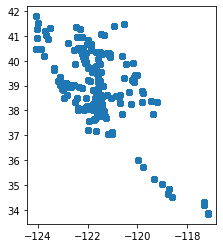

In [38]:
gdf.plot()

# Plot on world